# Analisis Exploratorio de Datos

Importaremos las librerias que usaremos en todo el proyecto

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
%matplotlib inline


Crearemos un DataFrame que almacenara todos los datos de nuestro csv extraido de Kaggle 

In [7]:
df_train= pd.read_csv("train.csv")

Ahora daremos un vistazo rapido a los datos para ver que datos trae el DataFrame.

In [8]:
df_train.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


Con **shape** verificamos el orden de la tabla , en este caso nos muestra que son 1460 filas y 81 columnas.

In [5]:
df_train.shape

(1460, 81)

Verifiquemos cual es el precio promedio con  **mean**. Esto sera aplicado a la Columna 'SalePrice' de la siguiente manera

In [7]:
df_train["SalePrice"].mean()

180921.19589041095

Y el método **Describe** te da un resumen de todo en el Dataframe

In [8]:
df_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


## Analisis de Precio de Ventas

Lo primero es conocer a "PrecioVenta". Vamos viendo su **describe**

In [10]:
df_train["SalePrice"].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Usamores distplot de seaborn para que nos grafique en base a la columna del precio de venta

C:\Users\danie\AppData\Local\Temp\ipykernel_23320\886804650.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['SalePrice'])


<Axes: xlabel='SalePrice', ylabel='Density'>

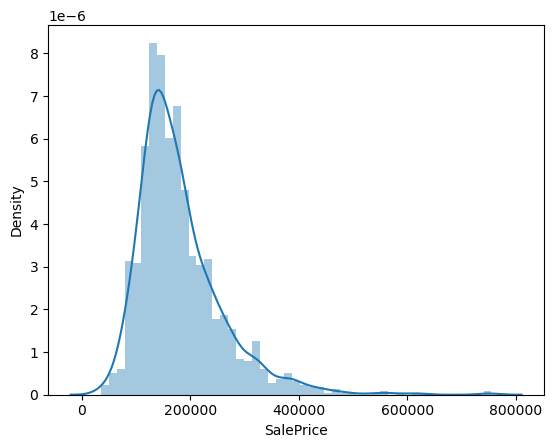

In [11]:
sns.distplot(df_train['SalePrice'])

Podemos conocer el skewness y la kurtosis de la gráfica usando los métodos **skew** y **kurt**

In [9]:
df_train['SalePrice'].skew()

1.8828757597682129

In [10]:
df_train['SalePrice'].kurt()

6.536281860064529

Vamos viendo que sucede con las conjeturas que tenemos acerca del precio de venta de **"PrecioVenta"** - dibujemos un ScatterPlot de **PrecioVenta** vs **AreaVivienda('GrLivArea')**.


In [14]:
var = "GrLivArea"

In [15]:
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)

In [16]:
data.head()

,SalePrice,GrLivArea
0,208500,1710
1,181500,1262
2,223500,1786
3,140000,1717
4,250000,2198


Y ahora vamos a terminar con un data.plot.scatter para crear una grafica de scatterplot. 

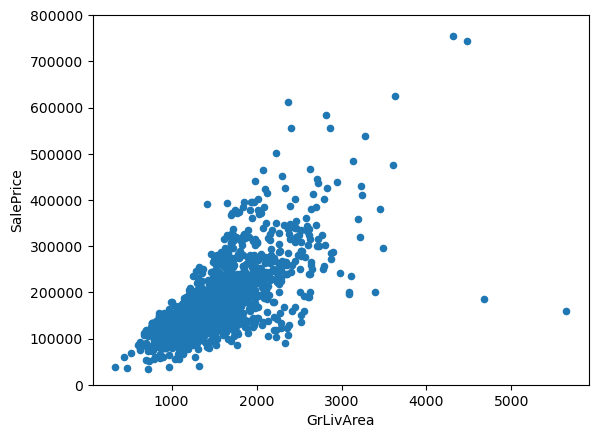

In [17]:
data.plot.scatter(x=var ,y='SalePrice',ylim=(0,800000));

Ahora que pasa con "PrecioVenta" y "AreaSotano"

<Axes: xlabel='TotalBsmtSF', ylabel='SalePrice'>

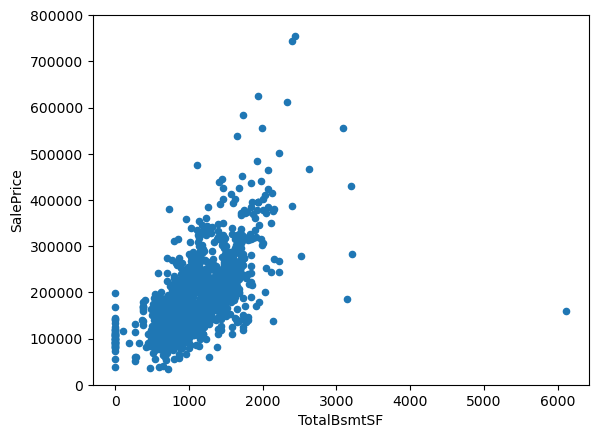

In [18]:
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)
data.plot.scatter(x=var,y='SalePrice',ylim=(0,800000))

#### Relaciones categóricas



Empezaremos de la misma manera declarando una variable que sea la columna en el dataset

In [19]:
var='OverallQual'

In [20]:
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)

In [21]:
data.head()

,SalePrice,OverallQual
0,208500,7
1,181500,6
2,223500,7
3,140000,7
4,250000,8


Ahora viene lo dificl, en dos variables f y ax, vamos a guardar el resultado de un plt.subplots - donde se define la nueva figura donde existirá la gráfica que se va a crear. F y ax es la figura y los ejes que devuelve la instruccion

(-0.5, 9.5, 0.0, 800000.0)

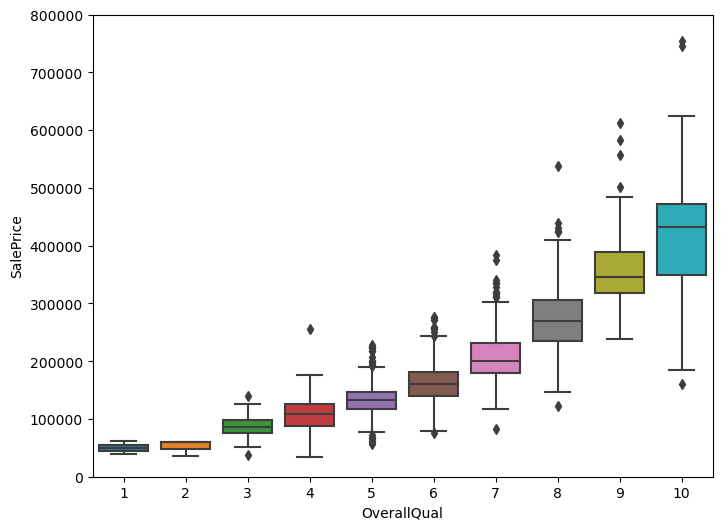

In [22]:
f,ax=plt.subplots(figsize=(8,6))
fig= sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)

Hagamos lo exacto mismo pero con Precio de Venta vs Año Construida

In [16]:
var='YearBuilt'

In [17]:
data = pd.concat([df_train['SalePrice'],df_train[var]],axis=1)

In [18]:
data.head()

,SalePrice,YearBuilt
0,208500,2003
1,181500,1976
2,223500,2001
3,140000,1915
4,250000,2000


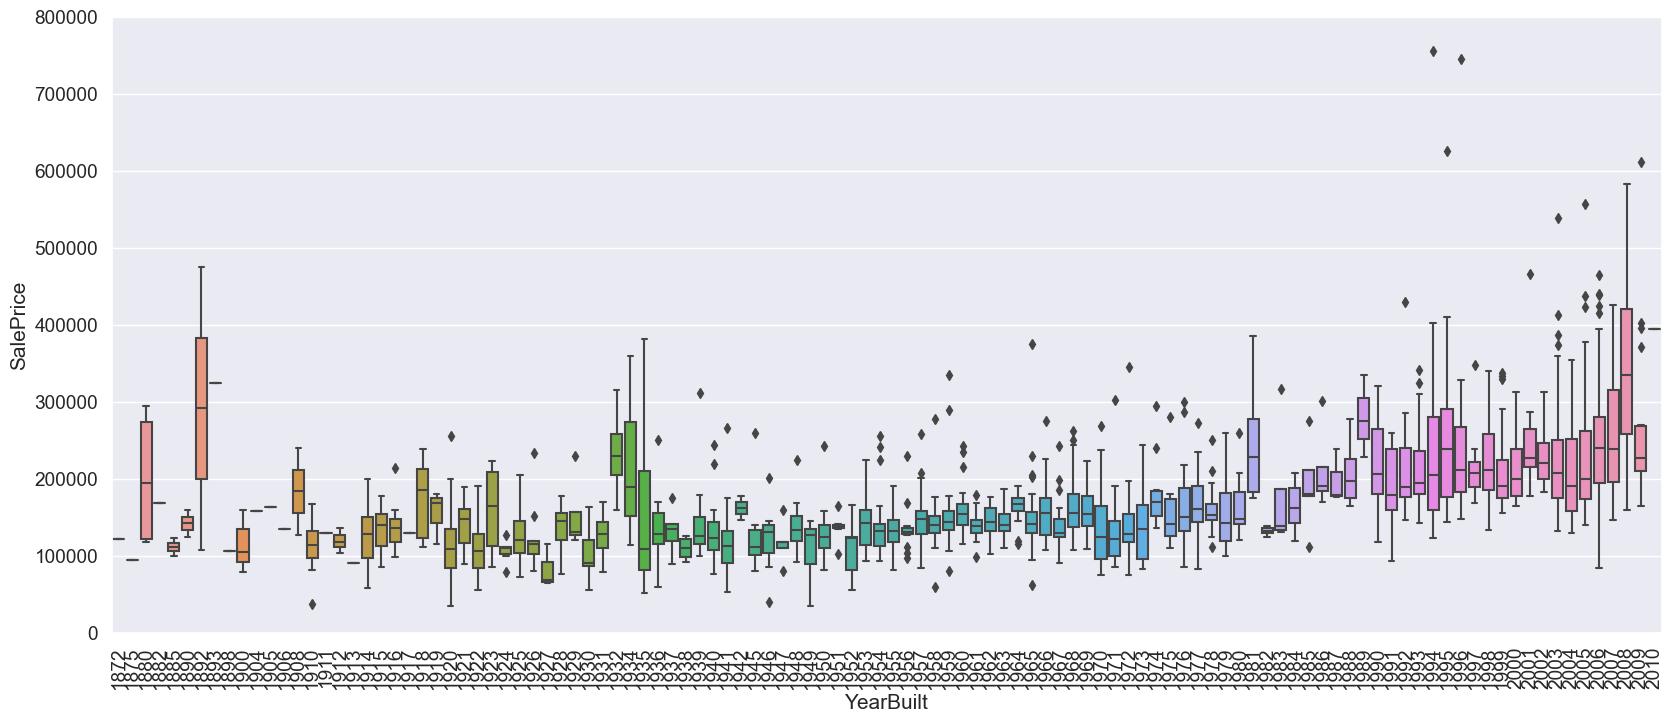

In [30]:
f,ax = plt.subplots(figsize=(20,8))
fig= sns.boxplot(x=var,y='SalePrice',data=data)
fig.axis(ymin=0,ymax=800000)
plt.xticks(rotation=90)
plt.show()

Aqui hemos realizado la exacta misma operacion que en la grafica pasada solo que agregamos un comando que 
nos permite rotar a una posicion vertical el texto por a;o solo por comodidad visual . 

## Confirmando nuestra intuición

###  Matriz de Correlación

Lo primero es armar una matriz de correlación (mapa de calor) para ver cuales son las variables más correlacionadas

Vamos declarando una variable corrmat = df_train.corr() con todas las correlaciones entre variables

In [31]:
corrmat = df_train.corr()

C:\Users\danie\AppData\Local\Temp\ipykernel_3476\285592702.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df_train.corr()


<Axes: >

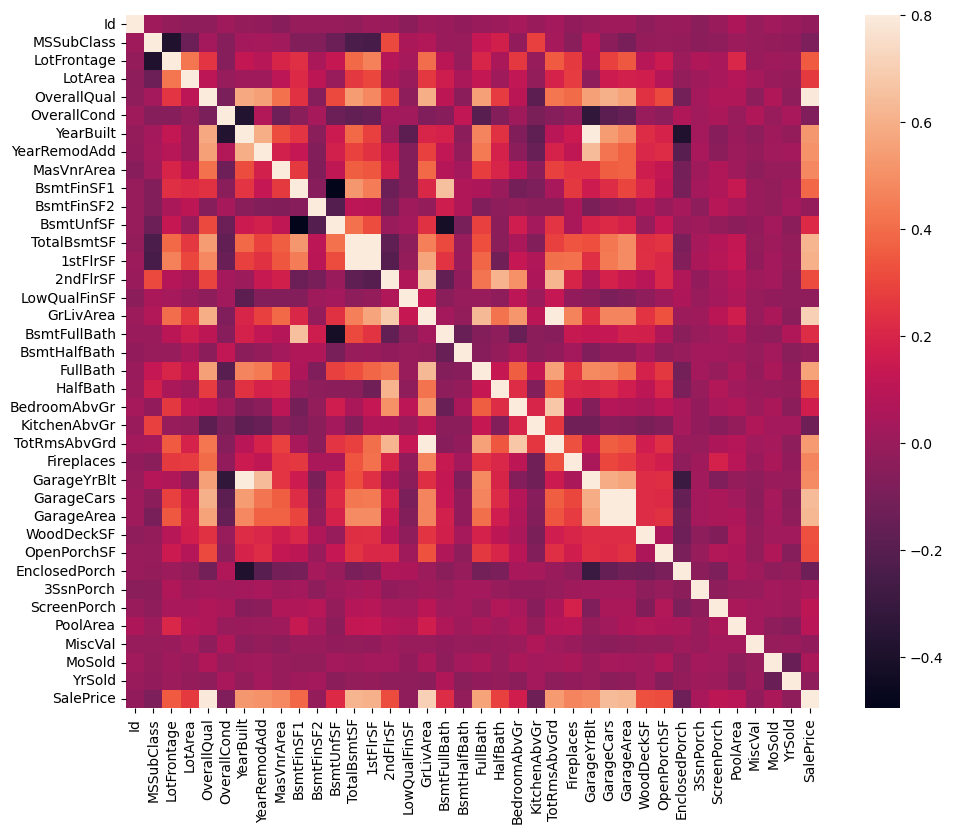

In [21]:
f,ax =plt.subplots(figsize=(12,9))
sns.heatmap(corrmat,vmax=.8,square=True)

### Matriz de Correlación con Números

Lo que ahora intentaremos para ver cuales son las variables que tienen aun mas correlacion enumerandolas segun su relacion para esto haremos un cuadro parecido al anterior.

In [22]:
 k=10

In [23]:
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index

Este codigo toma los 'k' numeros mas grandres que se relacionan con la columna SalePrice, ahora vemos que nos arroja cols

In [24]:
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt'],
      dtype='object')

Aqui transpondremos las columnas en un arreglo que se interpondra encima del mapa

In [25]:
cm=np.corrcoef(df_train[cols].values.T)

In [26]:
cm

array([[1.        , 0.7909816 , 0.70862448, 0.6404092 , 0.62343144,
        0.61358055, 0.60585218, 0.56066376, 0.53372316, 0.52289733],
       [0.7909816 , 1.        , 0.59300743, 0.60067072, 0.56202176,
        0.5378085 , 0.47622383, 0.55059971, 0.42745234, 0.57232277],
       [0.70862448, 0.59300743, 1.        , 0.46724742, 0.46899748,
        0.4548682 , 0.56602397, 0.63001165, 0.82548937, 0.19900971],
       [0.6404092 , 0.60067072, 0.46724742, 1.        , 0.88247541,
        0.43458483, 0.43931681, 0.46967204, 0.36228857, 0.53785009],
       [0.62343144, 0.56202176, 0.46899748, 0.88247541, 1.        ,
        0.48666546, 0.48978165, 0.40565621, 0.33782212, 0.47895382],
       [0.61358055, 0.5378085 , 0.4548682 , 0.43458483, 0.48666546,
        1.        , 0.81952998, 0.32372241, 0.28557256, 0.391452  ],
       [0.60585218, 0.47622383, 0.56602397, 0.43931681, 0.48978165,
        0.81952998, 1.        , 0.38063749, 0.40951598, 0.28198586],
       [0.56066376, 0.55059971, 0.6300116

Seguimos con sns.set(font_scale=1.25)

In [28]:
sns.set(font_scale=1.25)

Armarmos el heatmap con hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

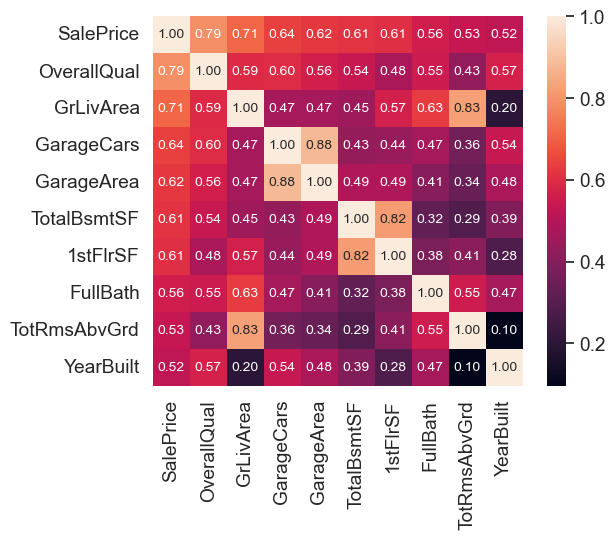

In [29]:
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)

Podemos ver que:
- Calidad, AreaVivienda y area Sotano estan muy fuertemente correlacionadas con PrecioVenta
- Las variables de garage están super correlacionadas
- Sotano y 1er piso son basicamente hermanos gemelos
- Y AñoConstruccion esta ligeramente correlacionada con PrecioVenta, parece que en un futuro habra que hacer un analisis de serie de tiempo más serio.

### Scatter Plots entre Sale Price y variables Correlacionados

Por utlimo, hagamos scatterplots usando seabron de todas las posibles relaciones que podríamos tener en nuestro dataset - entre las variables que nos importan claro.

Comenzamos declarando sns.set()

In [39]:
sns.set()

Luego cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']

In [40]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']


Seguimos con sns.pairplot(df_train)

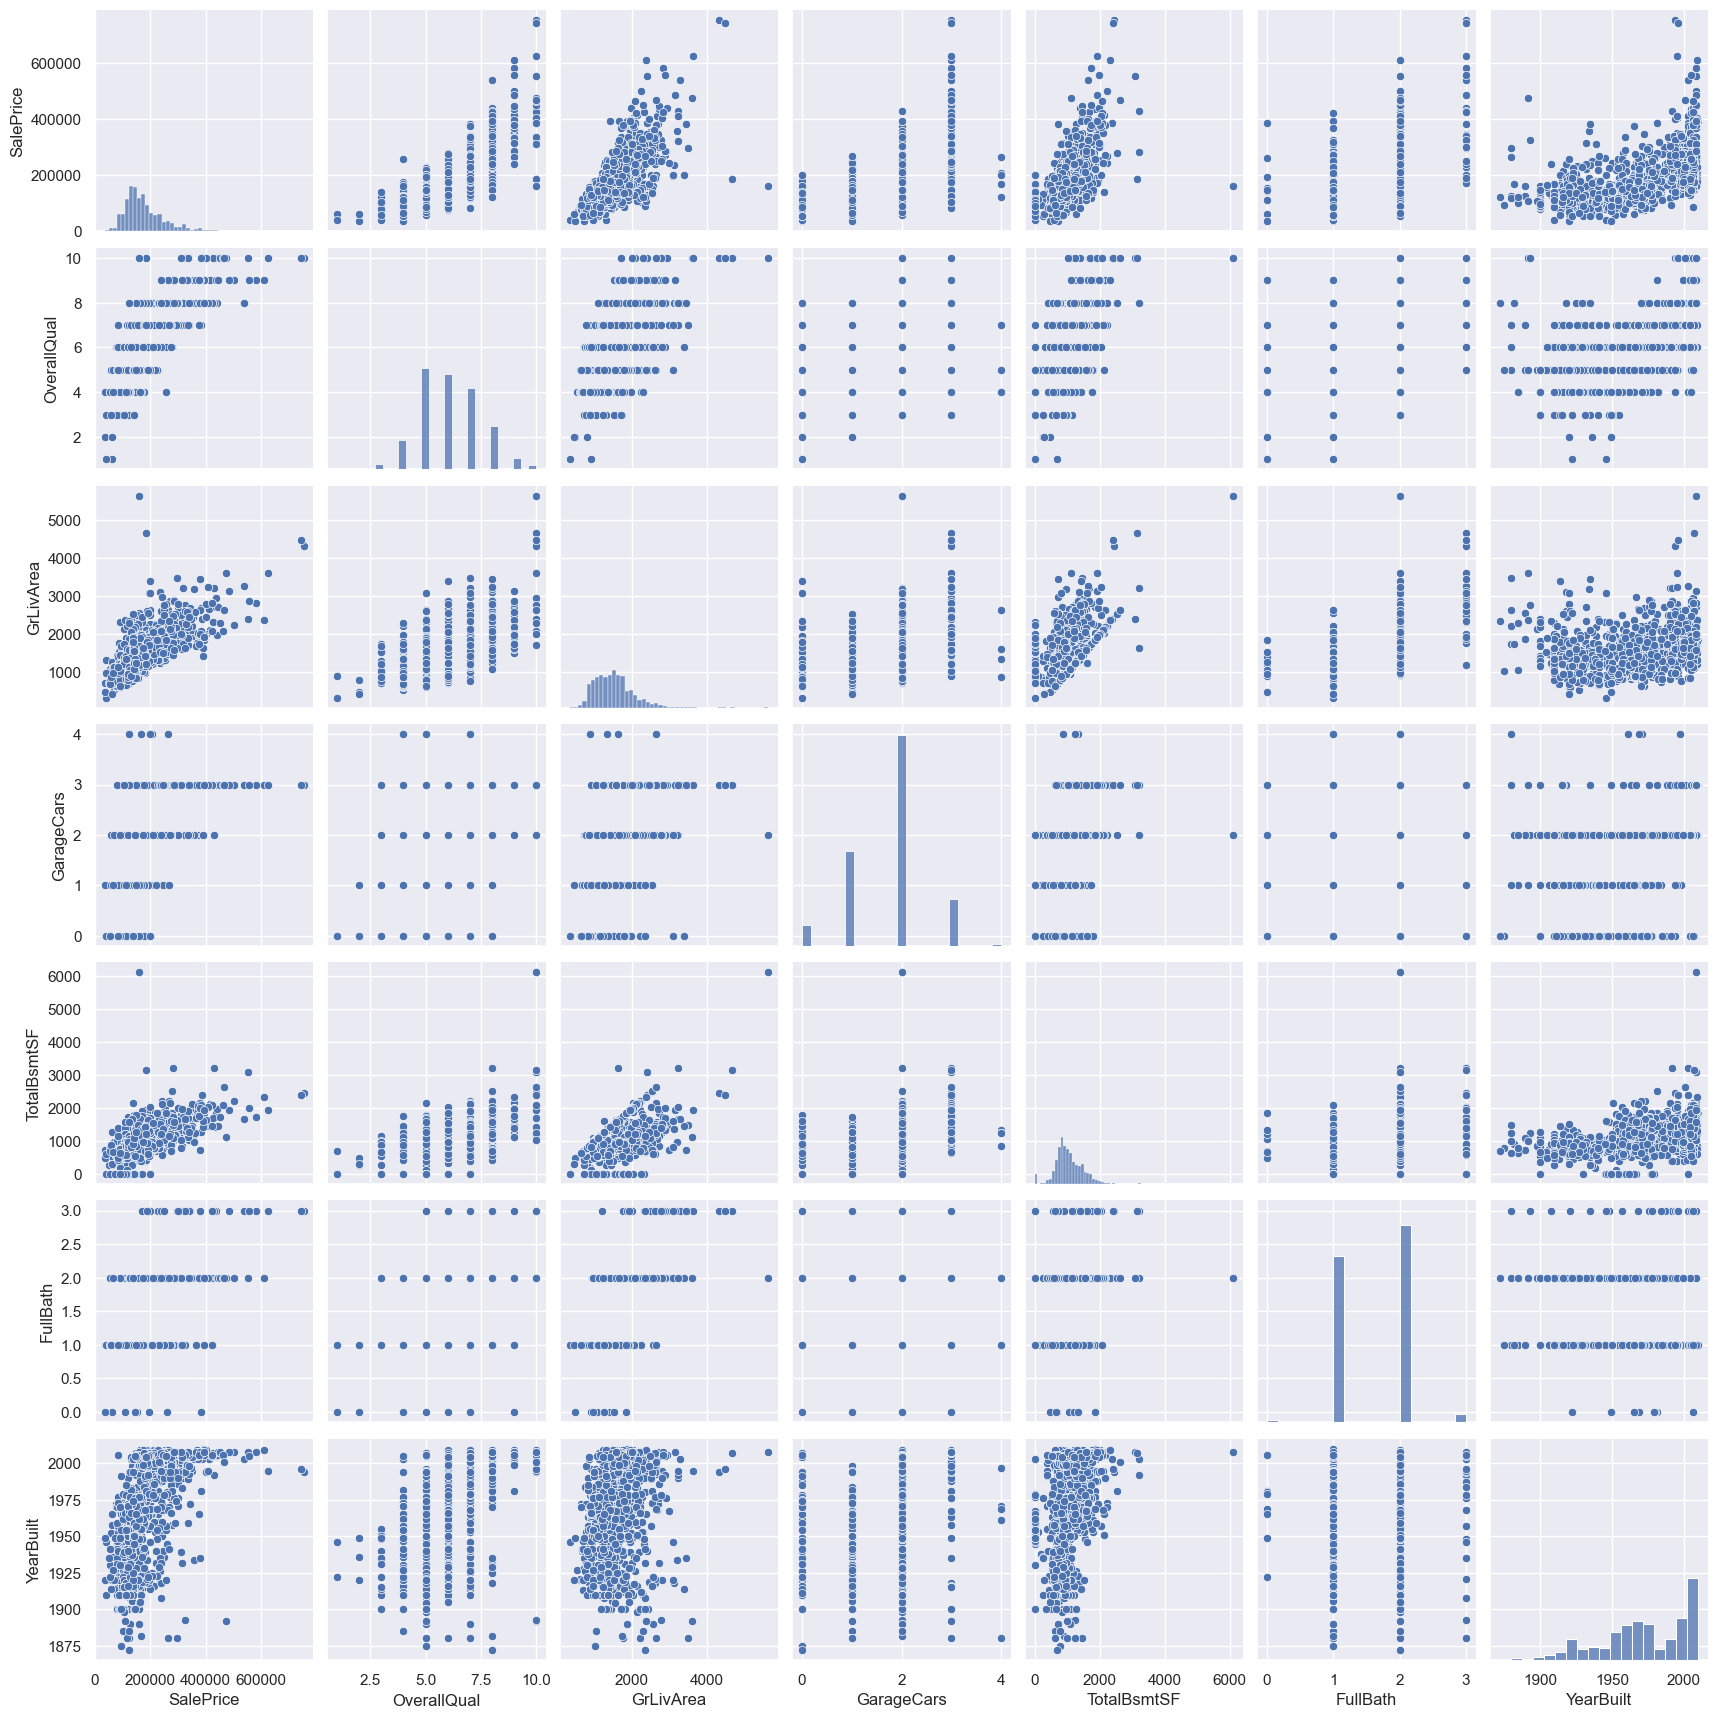

In [41]:
sns.pairplot(df_train[cols],height=2.5)
plt.show()